In [57]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
import boto3

In [46]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

Using ml.m5.4xlarge (16vCPU and 64GB)

In [4]:
MY_BUCKET = 'sagemaker-studio-8x6b1t9vueh'
file_name = 'df_processed.pkl'

s3 = boto3.resource('s3')
preprocessed_df_ref = s3.Object(MY_BUCKET, file_name)

In [5]:
df = pickle.loads(preprocessed_df_ref.get()['Body'].read())

## Attempting to create a correlation heatmap of all non-categorical values.

In [6]:
non_categorical_features = [feature_name for feature_name, dtype in zip(df.dtypes.index, df.dtypes.to_list())
                            if 'float' in str(dtype)]

In [7]:
non_categorical_features

['Flow Duration',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Std',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Tot',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd Header Len',
 'Bwd Header Len',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Std',
 'Pkt Len Var',
 'Down/Up Ratio',
 'Pkt Size Avg',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Fwd Blk Rate Avg',
 'Bwd Byts/b Avg',
 'Bwd Pkts/b Avg',
 'Bwd Blk Rate Avg',
 'Subflow Fwd Pkts',
 'Subflow Fwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Bwd Byts',
 'Init Fwd Win Byts',
 'Init Bwd Win Byts',
 'Fwd Act D

## TODO:Divide on basis of Benign vs rest for heatmap EDA.
## TODO:Compare all mins, max, std etc. together by further spliting the above list of feature names. 

In [8]:
df_benign = df.loc[df['Label'] == 'Benign']
df_not_benign = df.loc[df['Label'] != 'Benign']

In [21]:
features = {}

for check in ['Max', 'Min', 'Std', 'Avg', 'Mean', 'Tot', 'Fwd', 'Bwd']:
    for cols in non_categorical_features:
        if check in cols:
            if check == 'Avg' or check == 'Mean':
                check = 'Avg'

            if check in features:
                features[check].append(cols)
            else:
                features[check] = [cols]

features

{'Max': ['Fwd Pkt Len Max',
  'Bwd Pkt Len Max',
  'Flow IAT Max',
  'Fwd IAT Max',
  'Bwd IAT Max',
  'Pkt Len Max',
  'Active Max',
  'Idle Max'],
 'Min': ['Fwd Pkt Len Min',
  'Bwd Pkt Len Min',
  'Flow IAT Min',
  'Fwd IAT Min',
  'Bwd IAT Min',
  'Pkt Len Min',
  'Fwd Seg Size Min',
  'Active Min',
  'Idle Min'],
 'Std': ['Fwd Pkt Len Std',
  'Bwd Pkt Len Std',
  'Flow IAT Std',
  'Fwd IAT Std',
  'Bwd IAT Std',
  'Pkt Len Std',
  'Active Std',
  'Idle Std'],
 'Avg': ['Pkt Size Avg',
  'Fwd Seg Size Avg',
  'Bwd Seg Size Avg',
  'Fwd Byts/b Avg',
  'Fwd Pkts/b Avg',
  'Fwd Blk Rate Avg',
  'Bwd Byts/b Avg',
  'Bwd Pkts/b Avg',
  'Bwd Blk Rate Avg',
  'Fwd Pkt Len Mean',
  'Pkt Size Avg',
  'Fwd Seg Size Avg',
  'Bwd Seg Size Avg',
  'Fwd Byts/b Avg',
  'Fwd Pkts/b Avg',
  'Fwd Blk Rate Avg',
  'Bwd Byts/b Avg',
  'Bwd Pkts/b Avg',
  'Bwd Blk Rate Avg'],
 'Tot': ['Tot Fwd Pkts',
  'Tot Bwd Pkts',
  'TotLen Fwd Pkts',
  'TotLen Bwd Pkts',
  'Fwd IAT Tot',
  'Bwd IAT Tot'],
 'Fwd': [

In [26]:
corr = df_benign[features['Max']].corr()

In [27]:
corr

,Fwd Pkt Len Max,Bwd Pkt Len Max,Flow IAT Max,Fwd IAT Max,Bwd IAT Max,Pkt Len Max,Active Max,Idle Max
Fwd Pkt Len Max,1.000000,0.663928,-0.009446,-0.008058,0.150867,0.824106,0.000566,-0.015618
Bwd Pkt Len Max,0.663928,1.000000,0.117597,0.115055,0.385889,0.953127,0.005540,0.126908
Flow IAT Max,-0.009446,0.117597,1.000000,0.990763,0.541056,0.100185,0.059282,0.912448
Fwd IAT Max,-0.008058,0.115055,0.990763,1.000000,0.525447,0.098537,0.057280,0.904493
Bwd IAT Max,0.150867,0.385889,0.541056,0.525447,1.000000,0.362552,0.041474,0.591990
Pkt Len Max,0.824106,0.953127,0.100185,0.098537,0.362552,1.000000,0.002280,0.107182
Active Max,0.000566,0.005540,0.059282,0.057280,0.041474,0.002280,1.000000,0.070231
Idle Max,-0.015618,0.126908,0.912448,0.904493,0.591990,0.107182,0.070231,1.000000


In [41]:
corr =  df_not_benign[features['Max']].corr()
corr

,Fwd Pkt Len Max,Bwd Pkt Len Max,Flow IAT Max,Fwd IAT Max,Bwd IAT Max,Pkt Len Max,Active Max,Idle Max
Fwd Pkt Len Max,1.000000,0.590047,-0.044925,-0.045617,0.110929,0.638189,0.039444,-0.048343
Bwd Pkt Len Max,0.590047,1.000000,-0.069184,-0.097894,0.123841,0.992058,0.000710,-0.098223
Flow IAT Max,-0.044925,-0.069184,1.000000,0.997271,0.458983,-0.067890,0.093597,0.995423
Fwd IAT Max,-0.045617,-0.097894,0.997271,1.000000,0.449245,-0.096182,0.090235,0.994995
Bwd IAT Max,0.110929,0.123841,0.458983,0.449245,1.000000,0.137149,0.199146,0.454355
Pkt Len Max,0.638189,0.992058,-0.067890,-0.096182,0.137149,1.000000,0.010218,-0.096431
Active Max,0.039444,0.000710,0.093597,0.090235,0.199146,0.010218,1.000000,0.094048
Idle Max,-0.048343,-0.098223,0.995423,0.994995,0.454355,-0.096431,0.094048,1.000000


In [45]:
df_benign[features['Max']].corr() - df_not_benign[features['Max']].corr()

,Fwd Pkt Len Max,Bwd Pkt Len Max,Flow IAT Max,Fwd IAT Max,Bwd IAT Max,Pkt Len Max,Active Max,Idle Max
Fwd Pkt Len Max,0.000000,0.073881,0.035479,0.037559,0.039938,0.185918,-0.038877,0.032725
Bwd Pkt Len Max,0.073881,0.000000,0.186780,0.212950,0.262048,-0.038931,0.004831,0.225131
Flow IAT Max,0.035479,0.186780,0.000000,-0.006508,0.082074,0.168076,-0.034315,-0.082975
Fwd IAT Max,0.037559,0.212950,-0.006508,0.000000,0.076203,0.194720,-0.032955,-0.090502
Bwd IAT Max,0.039938,0.262048,0.082074,0.076203,0.000000,0.225403,-0.157672,0.137634
Pkt Len Max,0.185918,-0.038931,0.168076,0.194720,0.225403,0.000000,-0.007938,0.203613
Active Max,-0.038877,0.004831,-0.034315,-0.032955,-0.157672,-0.007938,0.000000,-0.023818
Idle Max,0.032725,0.225131,-0.082975,-0.090502,0.137634,0.203613,-0.023818,0.000000


In [44]:
print(corr)

                 Fwd Pkt Len Max  Bwd Pkt Len Max  Flow IAT Max  Fwd IAT Max  \
Fwd Pkt Len Max         1.000000         0.590047     -0.044925    -0.045617   
Bwd Pkt Len Max         0.590047         1.000000     -0.069184    -0.097894   
Flow IAT Max           -0.044925        -0.069184      1.000000     0.997271   
Fwd IAT Max            -0.045617        -0.097894      0.997271     1.000000   
Bwd IAT Max             0.110929         0.123841      0.458983     0.449245   
Pkt Len Max             0.638189         0.992058     -0.067890    -0.096182   
Active Max              0.039444         0.000710      0.093597     0.090235   
Idle Max               -0.048343        -0.098223      0.995423     0.994995   

                 Bwd IAT Max  Pkt Len Max  Active Max  Idle Max  
Fwd Pkt Len Max     0.110929     0.638189    0.039444 -0.048343  
Bwd Pkt Len Max     0.123841     0.992058    0.000710 -0.098223  
Flow IAT Max        0.458983    -0.067890    0.093597  0.995423  
Fwd IAT Max    

In [50]:
df_corr = df.corr()

In [51]:
file_name = 'df_corr.csv'

buffer = StringIO()

df_corr.to_csv(buffer)

corr_ref = s3.Object(MY_BUCKET, file_name)
corr_ref.put(Body=buffer.getvalue())

{'ResponseMetadata': {'RequestId': 'NR9WNE2AP1251V3P',
  'HostId': 'HKTTnX/7AmbnbuZhhMnJGOU+NirnvIFcJWscNcH8kbjSNc0LGhyvB64bjRCW1BluCEGcgObeeM0=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'HKTTnX/7AmbnbuZhhMnJGOU+NirnvIFcJWscNcH8kbjSNc0LGhyvB64bjRCW1BluCEGcgObeeM0=',
   'x-amz-request-id': 'NR9WNE2AP1251V3P',
   'date': 'Sun, 14 Nov 2021 05:08:22 GMT',
   'etag': '"9e562ed2450fd31de6032e0787a3bbd3"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"9e562ed2450fd31de6032e0787a3bbd3"'}

In [56]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))

In [66]:
from io import BytesIO

{'ResponseMetadata': {'RequestId': 'PQXSEMKQJVXCQJ9G',
  'HostId': '3ZL2sGLVcv1ERfuGyO47alv0G/InZNmm+3y8md87j5+INzrnhnCLtAwZlAk2XuWGXlDusRY+e7g=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': '3ZL2sGLVcv1ERfuGyO47alv0G/InZNmm+3y8md87j5+INzrnhnCLtAwZlAk2XuWGXlDusRY+e7g=',
   'x-amz-request-id': 'PQXSEMKQJVXCQJ9G',
   'date': 'Sun, 14 Nov 2021 05:42:24 GMT',
   'etag': '"14f6443efa31d7d93255f5a8db7c83d6"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"14f6443efa31d7d93255f5a8db7c83d6"'}

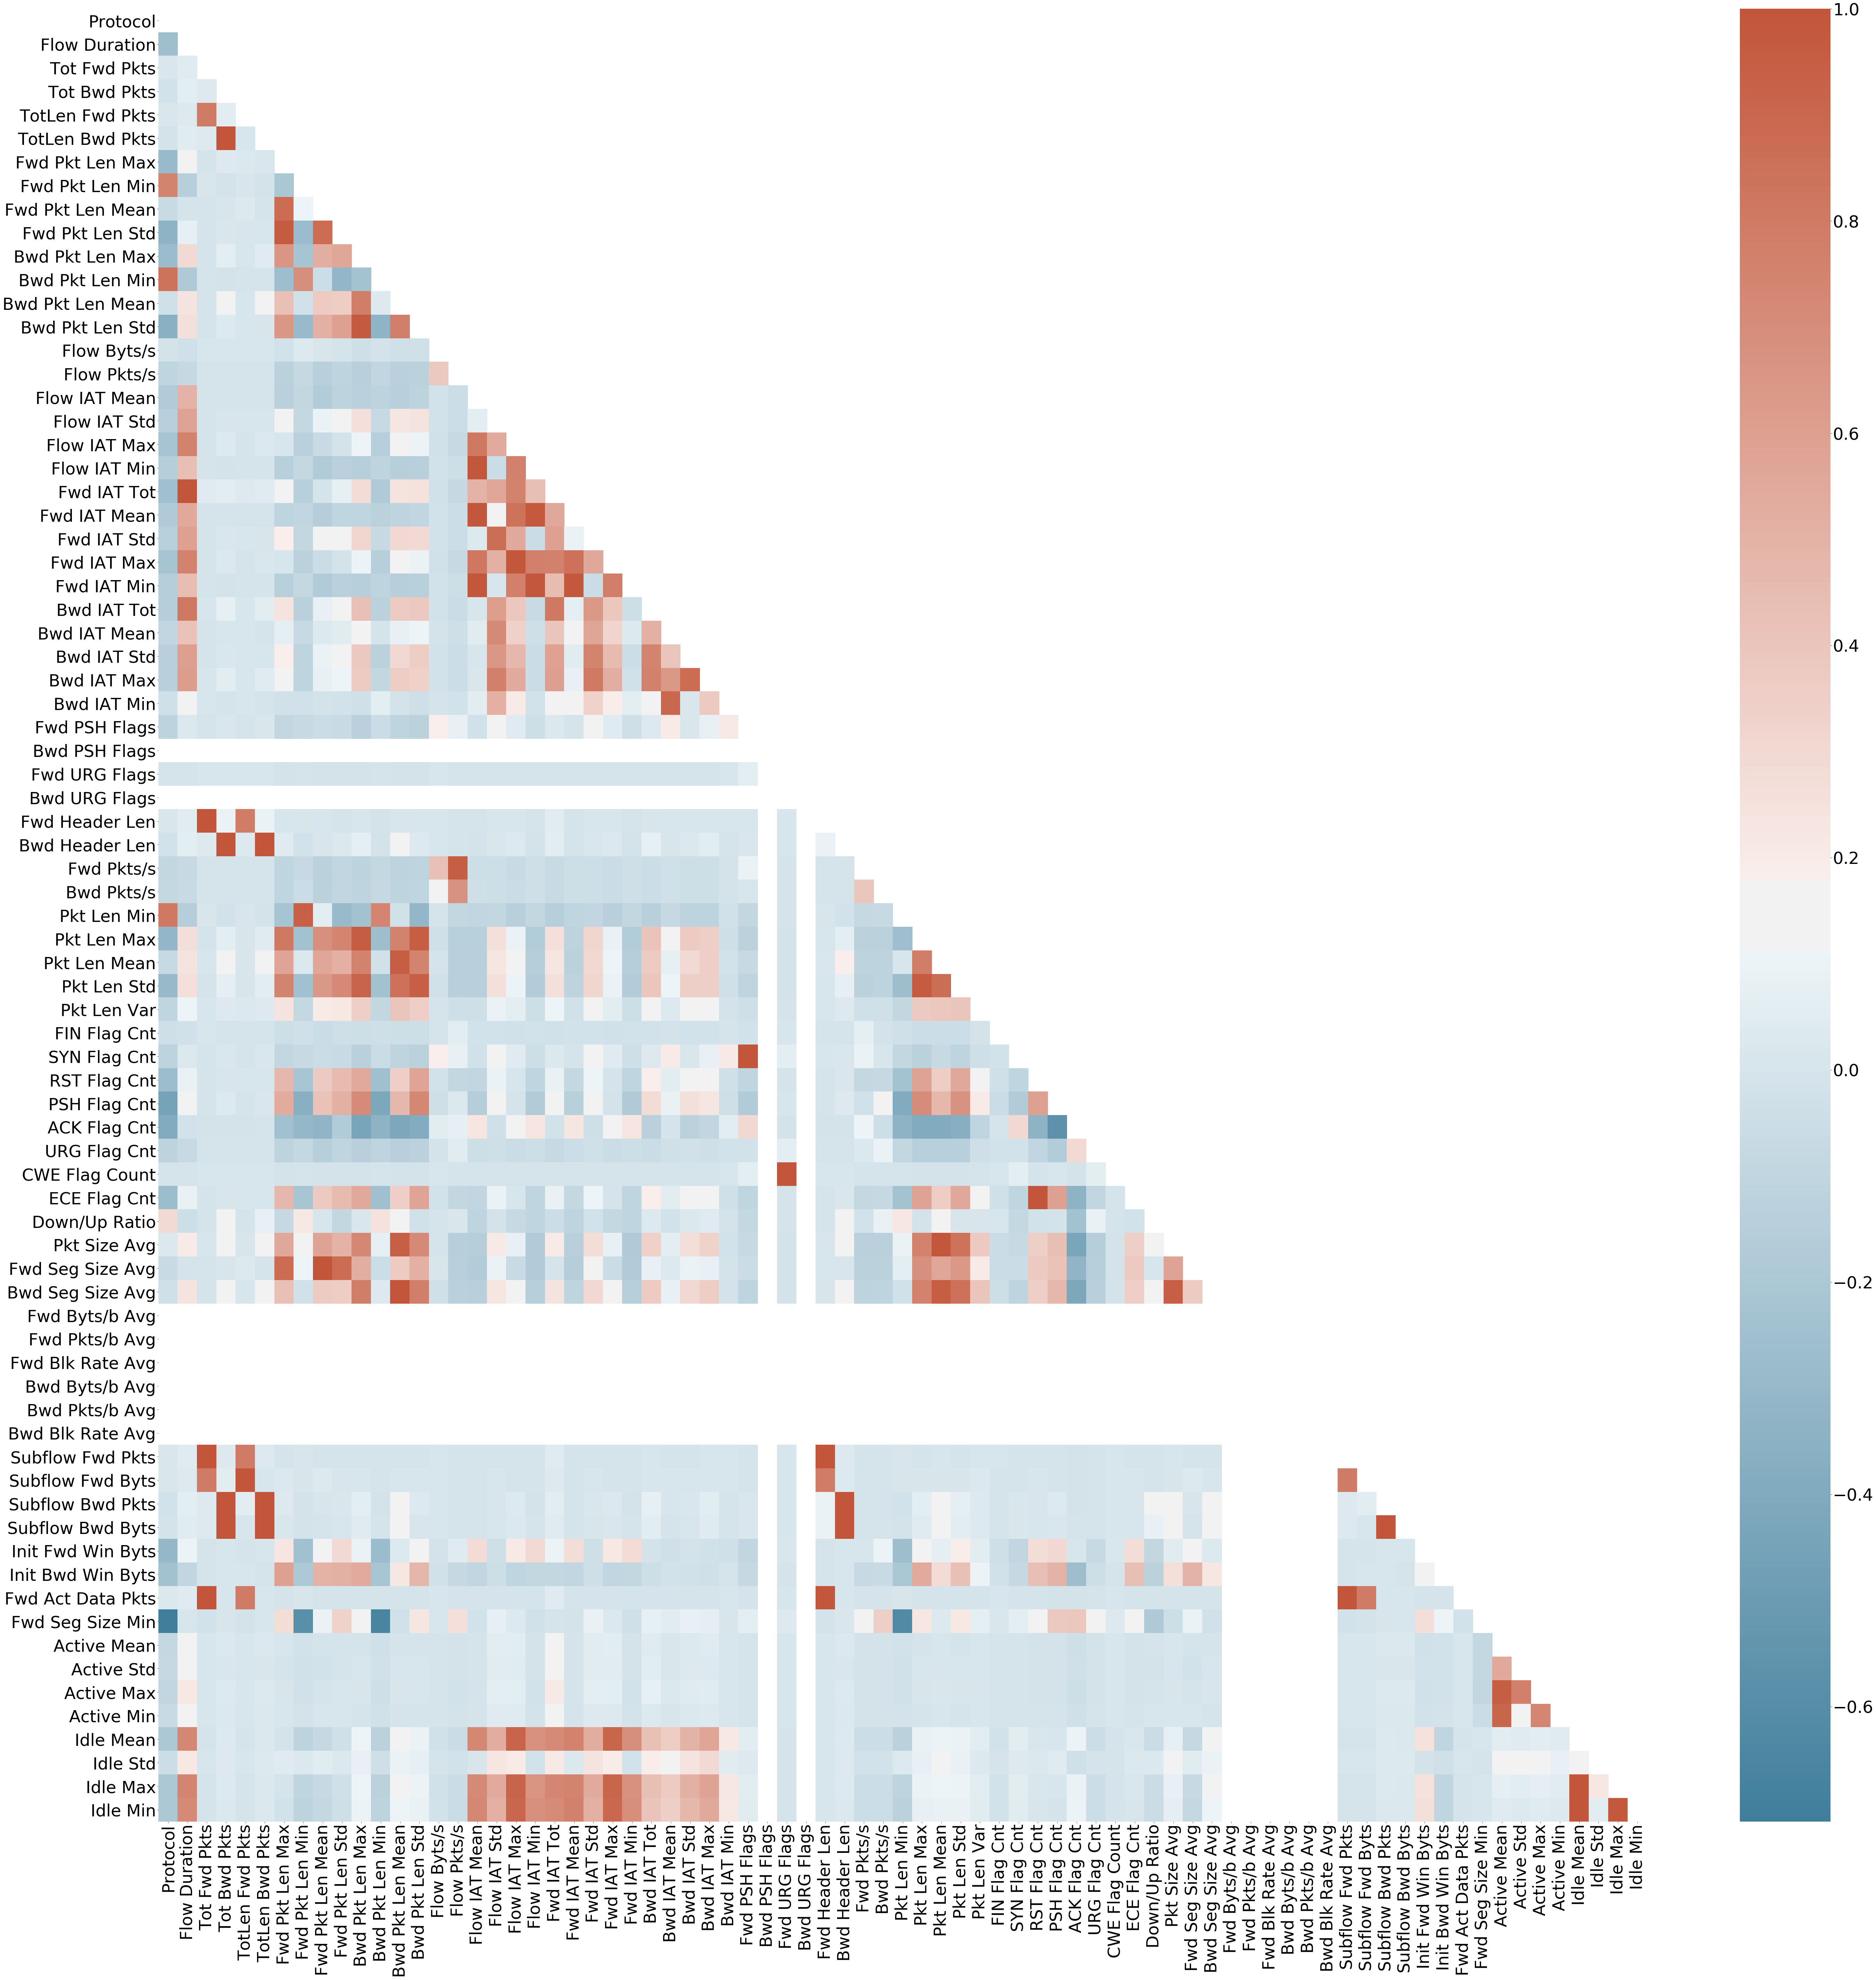

In [76]:
size = 96

_ = plt.figure(figsize=(size, size))
_ = plt.xticks(fontsize=size // 2)
_ = plt.yticks(fontsize=size // 2)

cmap = sns.diverging_palette(230, 20, as_cmap=True)

axes = sns.heatmap(df_corr, mask=mask, cmap=cmap)

color_bar = axes.collections[0].colorbar
color_bar.ax.tick_params(labelsize=size // 2)

image_buffer = BytesIO()
plt.savefig(image_buffer, format='png')
image_buffer.seek(0)

_ = s3.Object(MY_BUCKET, 'corr_heatmap.png').put(Body=image_buffer)